In [1]:
# Lets get some data
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv 

--2023-09-21 20:37:37--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2023-09-21 20:37:37 (14.9 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./housing.csv")

In [4]:
df.head().dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

<Axes: xlabel='median_house_value', ylabel='Count'>

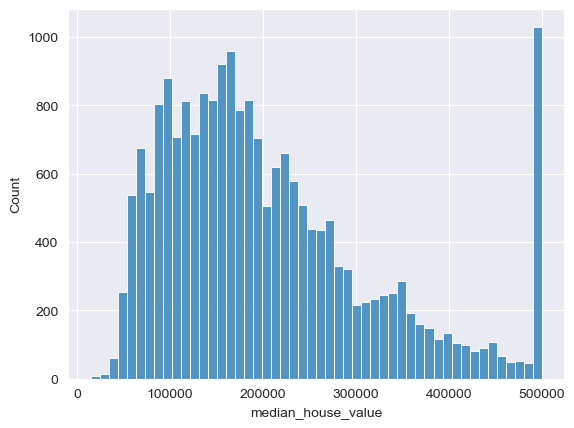

In [5]:
sns.histplot(df.median_house_value, bins=50)

In [6]:
 reduced_df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [7]:
base = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
]

In [8]:
subset_df = reduced_df[base]

In [9]:
subset_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [10]:
# Checking which series has null values
subset_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
# Checking the median of population
subset_df.population.median()

1195.0

In [12]:
np.random.seed(42)

n = len(subset_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n, n_val+n_test+n_train

(15687, 15687)

In [14]:
idx = np.arange(n)

In [15]:
np.random.shuffle(idx)
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [16]:
df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

In [17]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [18]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [19]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
df_train.iloc[4]

latitude                37.3400
longitude             -121.8700
housing_median_age      39.0000
total_rooms           2479.0000
total_bedrooms         541.0000
population            1990.0000
households             506.0000
median_income            2.4306
Name: 17546, dtype: float64

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [22]:
fill_zeros = df_train.fillna(0)
fill_median = df_train.fillna(df_train.total_bedrooms.mean())

In [23]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [24]:
w0, w = train_linear_regression(fill_zeros, y_train)
w0, w

(-9.763249478052225,
 array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
         2.93766353e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01]))

In [25]:
w0_med, w_med = train_linear_regression(fill_median, y_train)
w0_med, w_med

(-9.886133216145401,
 array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
         3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01]))

<Axes: ylabel='Count'>

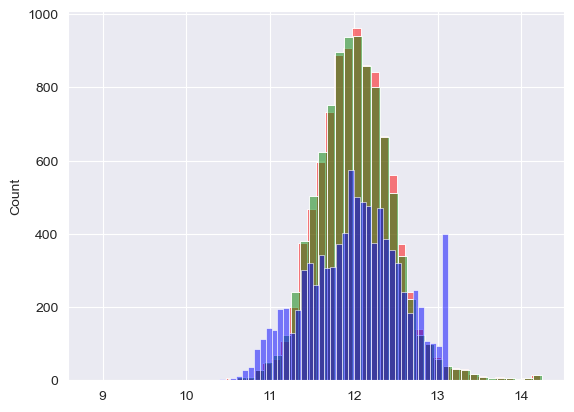

In [26]:
y_pred = w0 + fill_zeros.dot(w)
y_pred_two = w0_med + fill_median.dot(w_med)
sns.histplot(y_pred, color="red", alpha=0.5, bins=50)
sns.histplot(y_pred_two, color="green", alpha=0.5, bins=50)
sns.histplot(y_train, color="blue", alpha=0.5, bins=50)

In [27]:
r1 = round(rmse(y_train, y_pred), 2)
r2 = round(rmse(y_train, y_pred_two), 2)
r1, r2

(0.34, 0.34)

In [33]:
def train_linear_regression_reg(X, y, reg=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + reg * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [43]:
X_train = df_train.fillna(0)

for reg in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, reg)
    y_pred = w0 + X_train.dot(w)
    print(reg, ":", "rmse:", rmse(y_train, y_pred))


0 : rmse: 0.3402719715829534
1e-06 : rmse: 0.34027197158298483
0.0001 : rmse: 0.34027197189765424
0.001 : rmse: 0.34027200293365006
0.01 : rmse: 0.3402749908964379
0.1 : rmse: 0.34048643951072227
1 : rmse: 0.34350313673488736
5 : rmse: 0.3461012352738949
10 : rmse: 0.3466347720482579


In [45]:
n = len(subset_df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

rmses = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:    
    np.random.seed(s)    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
    y_val = np.log1p(df_val.median_house_value.values)
    del df_val['median_house_value']
    df_val = df_val.fillna(0)
    
    w0, w = train_linear_regression(df_val, y_val)
    y_pred = w0 + df_val.dot(w)
    rmses.append(rmse(y_val, y_pred))
    
np.std(rmses)    

0.005189962818433047

In [83]:
n = len(subset_df)

np.random.seed(9)    

idx = np.arange(n)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = subset_df.iloc[idx[:n_train]]
df_val = subset_df.iloc[idx[n_train:n_train+n_val]]
df_test = subset_df.iloc[idx[n_train+n_val:]]

comb_df = pd.concat([df_train, df_val])
comb_df = comb_df.reset_index(drop=True)
comb_df = comb_df.fillna(0)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)

comb_y = np.concatenate([y_train, y_val])
comb_y

w0, w = train_linear_regression_reg(comb_df, comb_y, 0.001)

y_pred = w0 + df_test.dot(w)
y_pred

res = rmse(y_test, y_pred)
res

0.16498208163355377